In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/ArinB/CA05-B-Logistic-Regression/master/cvd_data.csv')
data = data.dropna()
data.shape
data.count()
data.head()
#16 variables to classify the patient's risk for CVD

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


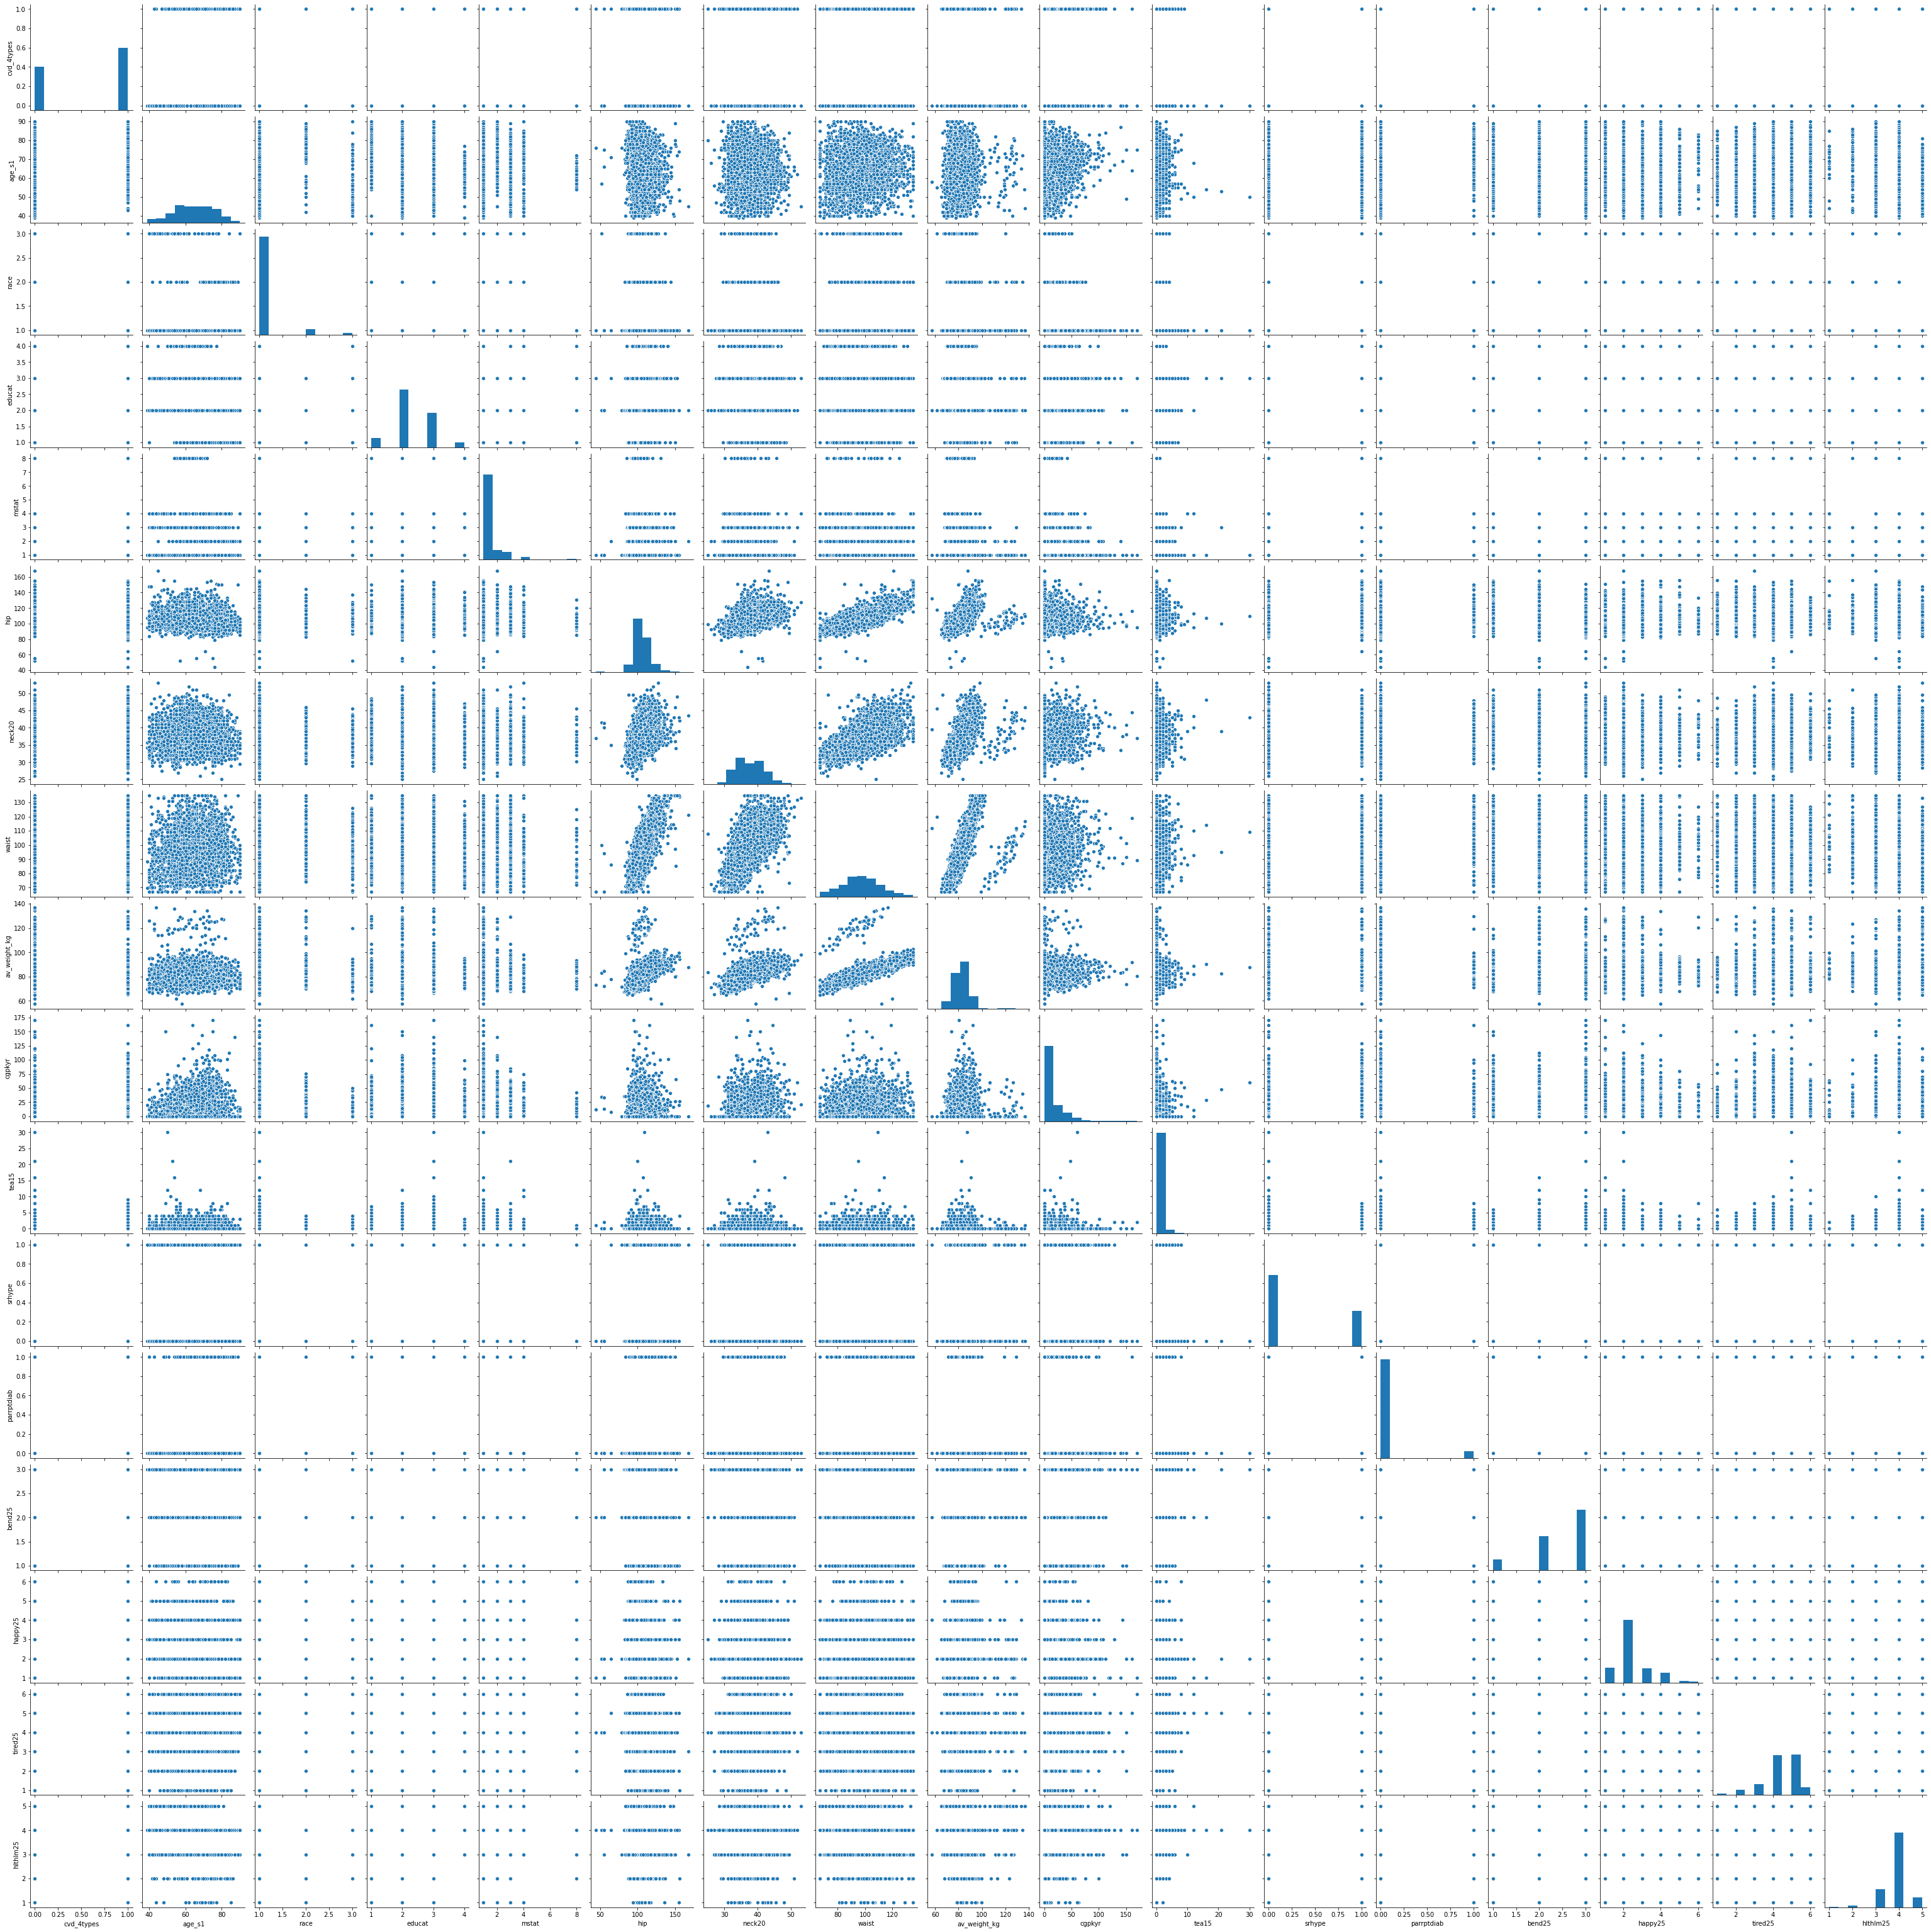

In [4]:
#Visualize relationships among variables 
data_pairplot= data[['age_s1','race', 'educat','mstat','hip','neck20','waist','av_weight_kg','cgpkyr','tea15','srhype','parrptdiab','bend25','happy25','tired25','hlthlm25']]
data_plot= sns.pairplot(data=data, kind='scatter', diag_kind='hist')

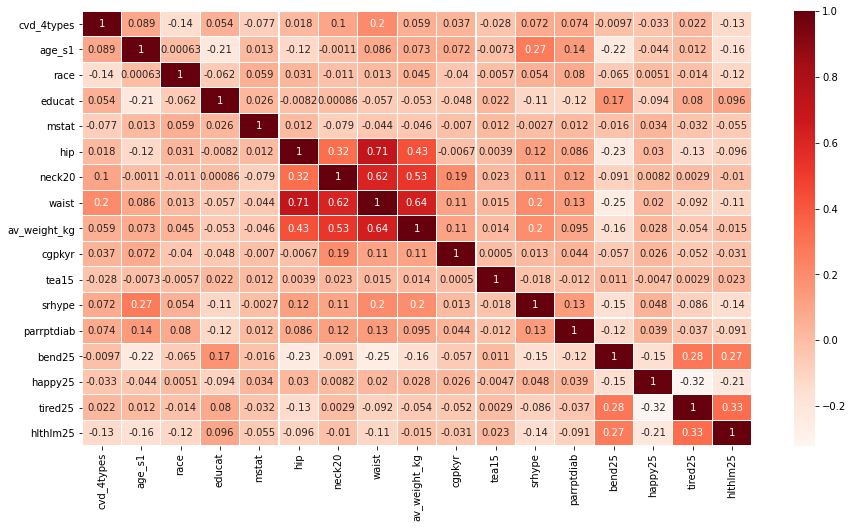

In [29]:
#Check for multicollinearity
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, linewidths=0.1, cmap='Reds')

#There should be no high correlations or multicollinearity among the independent variables. 
#I removed the variable 'hip', because it had a high correlation with waist (above 0.7).
#I experimented with removing other variables such as those with a correlation score above 0.6 (waist circumference, av_weight_kg, and neck20),
#but I found that the accuracy score didn’t improve. The model performed best when only removing hip. 
data = data.drop(['hip'], axis=1)

# Part 1. 
Build a binary classifier model to predict the CVD Risk (Yes/No, or 1/0) using a Logistic Regression Model with the best performance possible

In [0]:
#Create dummy variables for the categorical columns
data = pd.get_dummies(data, columns=['race','educat','mstat','srhype','bend25', 'parrptdiab','happy25','tired25','hlthlm25'])

#Separate the data into dependent and independent variables
X=data.drop(['cvd_4types'],axis=1)
y= data.cvd_4types

#Normalize the scales
normalized_X = preprocessing.normalize(X)

#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
#Build the model
model = lm.LogisticRegression()

#model = LogisticRegression()
model.fit(X_train, y_train)
print(model.coef_)

features= np.std(X_train, 0)*model.coef_[0]
print(features)

[[ 0.00704003 -0.06270463  0.04713263 -0.03143846  0.00284063  0.00477751
   0.59363492 -0.16523849 -0.58822478  0.05732782 -0.54626016 -0.40230921
   0.7314132   0.62688869 -0.3263014  -0.09329588 -0.62779292  0.26067316
  -0.17763076  0.01780241 -0.29255428  0.08254676  0.05017917 -0.46273376
   0.30290541 -0.14192642  0.01403133 -0.11320058  0.00500133  0.1209868
  -0.04472081  0.01574171 -0.0143645  -0.18248556 -0.1466416   0.03638609
   0.13153551 -0.06361199  0.08411658  0.56025328  0.64186901 -1.38245523]]
age_s1          0.073520
neck20         -0.254256
waist           0.636688
av_weight_kg   -0.248714
cgpkyr          0.057823
tea15           0.005888
race_1          0.156706
race_2         -0.037271
race_3         -0.085503
educat_1        0.016030
educat_2       -0.272646
educat_3       -0.190248
educat_4        0.155042
mstat_1         0.251416
mstat_2        -0.092717
mstat_3        -0.024562
mstat_4        -0.107040
mstat_8         0.023125
srhype_0       -0.083754
srhype

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
#Use model for prediction
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test.values.flatten(),y_pred)
print("Accuracy Score:", accuracy)

parameters = model.coef_
print("Model Parameters:", parameters)

Accuracy Score: 0.6896197327852004
Model Parameters: [[ 0.00704003 -0.06270463  0.04713263 -0.03143846  0.00284063  0.00477751
   0.59363492 -0.16523849 -0.58822478  0.05732782 -0.54626016 -0.40230921
   0.7314132   0.62688869 -0.3263014  -0.09329588 -0.62779292  0.26067316
  -0.17763076  0.01780241 -0.29255428  0.08254676  0.05017917 -0.46273376
   0.30290541 -0.14192642  0.01403133 -0.11320058  0.00500133  0.1209868
  -0.04472081  0.01574171 -0.0143645  -0.18248556 -0.1466416   0.03638609
   0.13153551 -0.06361199  0.08411658  0.56025328  0.64186901 -1.38245523]]


# Part 2. 
Display the Feature Importance of all the features sorted in the order of decreasing influence on
the CVD Risk 

In [33]:
features.sort_values(ascending=False)
#Waist has the highest influence followed by health limiting social activites level 4/5 and marital status 1 (being married).

waist           0.636688
hlthlm25_4      0.295396
mstat_1         0.251416
hlthlm25_3      0.214536
race_1          0.156706
educat_4        0.155042
parrptdiab_1    0.073608
age_s1          0.073520
cgpkyr          0.057823
bend25_2        0.038671
tired25_6       0.035367
bend25_3        0.024788
mstat_8         0.023125
tired25_5       0.017644
happy25_5       0.016869
educat_1        0.016030
hlthlm25_2      0.011205
srhype_1        0.008394
happy25_2       0.006904
tea15           0.005888
tired25_1       0.001940
happy25_4       0.001474
tired25_2      -0.003072
happy25_6      -0.004480
hlthlm25_1     -0.004801
mstat_3        -0.024562
race_2         -0.037271
happy25_3      -0.039089
happy25_1      -0.050223
tired25_3      -0.055288
tired25_4      -0.071094
srhype_0       -0.083754
race_3         -0.085503
bend25_1       -0.086743
mstat_2        -0.092717
mstat_4        -0.107040
parrptdiab_0   -0.112447
educat_3       -0.190248
av_weight_kg   -0.248714
neck20         -0.254256


# Part 3. 
Evaluate the performance of your model (including ROC Curve), explain the performance and draw a meaningful conclusion.

              precision    recall  f1-score   support

           0       0.70      0.39      0.50       388
           1       0.69      0.89      0.78       585

    accuracy                           0.69       973
   macro avg       0.69      0.64      0.64       973
weighted avg       0.69      0.69      0.66       973

Accuracy: 0.69
Precision: 0.69
Recall: 0.89
F1 Score: 0.78
AUC Value: 0.64


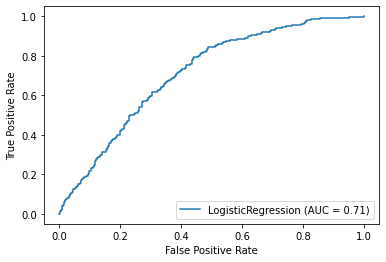

In [25]:
#Model Evaluation

#Classification Report 
cr=classification_report(y_test,y_pred)
print(cr)

#Accuracy Score
acc= metrics.accuracy_score(y_test, y_pred)
print('Accuracy:',round(acc, 2))

#Precision, Recall, and F1 Score
precision= precision_score(y_test, y_pred)
print('Precision:', round(precision, 2))

recall=recall_score(y_test, y_pred)
print('Recall:', round(recall, 2))

f1=f1_score(y_test, y_pred)
print('F1 Score:', round(f1, 2))

#AUC Value using predicted scores 
auc=roc_auc_score(y_test, y_pred)
print('AUC Value:', round(auc, 2))

#ROC Curve Graph
plot_roc_curve(model, X_test, y_test)

When evaluating the model’s performance the results show that precision and recall are balanced because the f1 score is relatively high at 0.78. The model has a high recall, which means that of all the people that are actually at risk for CVD, the model correctly predicted 87% of them. For precision, out of the people that the model predicted as at risk for CVD, 69% of those predictions are correct. 


Accuracy is also relatively high at 0.69. The AUC value from the predicted scores is 0.64, which is not particularly high as 0.5 means the classification is almost random 50-50. When plotting the ROC from X_test and y_test, it shows that the AUC is 0.71. These scores indicate that the model is good and acceptable as it does a better job than random, but it is not an excellent model in its ability to classify patient’s CVD risk based on these independent variables.

# References
https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24

https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/

https://www.statisticssolutions.com/what-is-logistic-regression/